# Pandas for beginners

![pandas](img/pandas.png)

Useful links
<br>➡ Documentation : [pandas.pydata.org](https://pandas.pydata.org/docs/index.html)

Pandas is a sort of plugin to Python. We will still use the basic Python logic in many cases, but in many ways Pandas also works completely different.

# 1. Intro into data types

In the previous lesson, you saw strings, numbers, `lists` and `dictionaries`. These are data types. Pandas works with 2 additional data types: `Series` and `DataFrames`

In [1]:
import pandas as pd

## Series

`Series` are akin to columns of a table. You can create a `Series` from a `list`

In [7]:
s = pd.Series([1, 3, 5, 7, 6, 8])
s

0    1
1    3
2    5
3    7
4    6
5    8
dtype: int64

## DataFrames

`DataFrame` is an actual table with rows (index) and columns. There are many ways to create a DataFrame. We will be creating them exclusively from excel sheets and CSV tables, so this is just to understand how a dataframe is structured

In [31]:
from random import randint

df = pd.DataFrame({
        "A": 100.0,
        "B": pd.Timestamp("20130102"),
        "C": [randint(30,60), randint(30,60), randint(30,60), randint(30,60)],
        "D": [randint(30,60), randint(30,60), randint(30,60), randint(30,60)],
        "E": ["test", "train", "test", "train"],
        "F": "whatever"}
)
df

,A,B,C,D,E,F
0,100.0,2013-01-02,36,30,test,whatever
1,100.0,2013-01-02,60,56,train,whatever
2,100.0,2013-01-02,57,59,test,whatever
3,100.0,2013-01-02,58,34,train,whatever


In [37]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], index=[0,1,2], columns=['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


### Questions:
* From what other data types is the DataFrame structured in these two cases?

# Opening and exploring data

In [14]:
# We need to import the library first.
import pandas as pd

# and set some options for the max columns and number format
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100
pd.options.display.float_format = '{:,.2f}'.format

We will be working with the most recent published year of EU spending (2021), using the data from [EU Financial Transparency System (FTS)](https://ec.europa.eu/budget/financial-transparency-system/index.html). You will find it in the `data` folder

Depending on your data source, you can use either of these functions

```python
df = pd.read_csv()
df = pd.read_excel()
```

## 1. Open

In [4]:
df = pd.read_csv("data/FTS_2021.csv", na_values="-")

## 2. First exploration 

The first step for a data analysis is to look at the data first. What columns are there? How many rows? What is in the columns? Pandas has very helpful methods to do this.

```python
df.info() # information on the column names and non-zero values
df.sample(3) # returns 3 sample rows from the data
df.head(3) # returns the first 3 rows of the data
len(df) # returns the number of rows
df.columns # all the column names as a list
```
Try them all!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81593 entries, 0 to 81592
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Year                                             81593 non-null  int64 
 1   Budget                                           81593 non-null  object
 2   Reference of the Legal Commitment (LC)           81593 non-null  object
 3   Reference (Budget)                               81593 non-null  object
 4   Name of beneficiary                              81593 non-null  object
 5   VAT number of beneficiary                        71693 non-null  object
 6   Not-for-profit organisation (NFPO)               81593 non-null  object
 7   Non-governmental organisation (NGO)              81593 non-null  object
 8   Coordinator                                      81593 non-null  object
 9   Address                                

In [20]:
len(df)

81593

In [28]:
df.sample(3)

,Year,Budget,Reference of the Legal Commitment (LC),Reference (Budget),Name of beneficiary,VAT number of beneficiary,Not-for-profit organisation (NFPO),Non-governmental organisation (NGO),Coordinator,Address,City,Postal code,Beneficiary country,NUTS2,Geographical zone,Action location,Beneficiary’s contracted amount (EUR),Beneficiary’s estimated contracted amount (EUR),Beneficiary’s estimated consumed amount (EUR),Commitment contracted amount (EUR) (A),Additional/Reduced amount (EUR) (B),Commitment total amount (EUR) (A+B),Commitment consumed amount (EUR),Source of (estimated) detailed amount,Expense type,Subject of grant or contract,Responsible department,Budget line number,Budget line name,Programme name,Funding type,Beneficiary Group Code,Beneficiary type,Project start date,Project end date,Type of contract*,Management type,Benefiting country
23936,2021,BGUE,JAG.747284,JAG.747284.1,DEUTSCHE SPORTHOCHSCHULE KOLN*DSHSKOLN GERMAN SPORT UNIVERSITY COLOGNE,DE123474626,No,No,No,AM SPORTPARK MUNGERSDORF 6,KOLN,50933,Germany,Koln,NaN,NaN,"61,821.64","61,821.64","29,399.85","5,293,855.00",0.00,"5,293,855.00","2,517,542.00","An estimated repartition for each beneficiary was available in our central accounting system ""AB...",Operational,945153 - FORTEE - GET STRONG TO FIGHT CHILDHOOD CANCER: AN EXERCISE INTERVENTION FOR CHILDREN AN...,HADEA - European Health and Digital Executive Agency,01 02 99 01,Completion of previous research programmes (prior to 2021),1.0.11 - Horizon Europe,Grant,LE04,Public Bodies,01/03/2021,31/08/2026,Action Grant,Direct management,"Denmark (6%), France (5%), Germany (53%), Italy (16%), Romania (1%), Slovenia (4%), Spain (5%), ..."
64242,2021,BGUE,JAD.755300,JAD.755091.2,SKL INTERNATIONAL AB*,SE556414420101,No,No,No,HORNSGATAN 15,STOCKHOLM,118 82,Sweden,Stockholm,Ukraine,UKRAINE,0.00,0.00,0.00,"22,200.00",0.00,"22,200.00","22,200.00","The repartition for each beneficiary was not available in our central accounting system ""ABAC"" a...",Operational,STUDY OF UKRAINE'S IMAGE IN EU COUNTRIES,NEAR - Directorate-General for Neighbourhood and Enlargement Negotiations,14 02 99 01,Completion of previous actions in the area of European Neighbourhood Policy and relations with R...,"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N...",Procurement contract,LE05,Private Companies,22/02/2021,01/02/2022,Studies,Direct management,Belgium 100%
18995,2021,BGUE,SI2.1045599,SI2.851599.1,COMUNE DI GALLIO,IT00174060244,No,No,No,VIA ROMA N 2,GALLIO,36032,Italy,Italia,NaN,NaN,"101,281.29","101,281.29","40,512.50","3,012,531.00",0.00,"3,012,531.00","1,205,012.00","An estimated repartition for each beneficiary was available in our central accounting system ""AB...",Operational,VALUING AFFORESTATION OF DAMAGED WOODS WITH INNOVATIVE AGROFORESTRY,CINEA - European Climate Infrastructure and Environment Executive Agency,09 02 99 01,Completion of previous programmes in the field of environment and climate action (LIFE) (prior t...,3.2.21 - Programme for Environment and Climate Action (LIFE),Grant,LE04,Public Bodies,15/07/2021,30/09/2026,Action Grant,Direct management,"France (11%), Italy (78%), Spain (11%)"


In [32]:
df.tail()

,Year,Budget,Reference of the Legal Commitment (LC),Reference (Budget),Name of beneficiary,VAT number of beneficiary,Not-for-profit organisation (NFPO),Non-governmental organisation (NGO),Coordinator,Address,City,Postal code,Beneficiary country,NUTS2,Geographical zone,Action location,Beneficiary’s contracted amount (EUR),Beneficiary’s estimated contracted amount (EUR),Beneficiary’s estimated consumed amount (EUR),Commitment contracted amount (EUR) (A),Additional/Reduced amount (EUR) (B),Commitment total amount (EUR) (A+B),Commitment consumed amount (EUR),Source of (estimated) detailed amount,Expense type,Subject of grant or contract,Responsible department,Budget line number,Budget line name,Programme name,Funding type,Beneficiary Group Code,Beneficiary type,Project start date,Project end date,Type of contract*,Management type,Benefiting country
81588,2021,BGUE,SI2.1087137,SI2.857231.2,ZWIAZEK MIEDZYGMINNY D/S EKOLOGII W ZYWCU*THE ASSOCIATION OF COMMUNESFOR ECOLOGY IN ZYWIEC,PL5531608375,No,No,No,KSIEDZA PRALATA STANISLAWA SLONKI 2,ZYWIEC,34300,Poland,Slaskie,NaN,NaN,"3,139.79","3,139.79",0.00,"241,411.00",0.00,"241,411.00",0.00,"An estimated repartition for each beneficiary was available in our central accounting system ""AB...",Operational,"""SILESIA. BLUE SKY RESTORED. COMPREHENSIVE IMPLEMENTATION OF THE AIR QUALITY PLAN FOR THE SILES...",CINEA - European Climate Infrastructure and Environment Executive Agency,09 02 99 01,Completion of previous programmes in the field of environment and climate action (LIFE) (prior t...,3.2.21 - Programme for Environment and Climate Action (LIFE),Grant,LE04,Public Bodies,01/01/2022,31/12/2027,Action Grant,Direct management,Poland 100%
81589,2021,BGUE,SI2.1087137,SI2.857231.5,ZWIAZEK MIEDZYGMINNY D/S EKOLOGII W ZYWCU*THE ASSOCIATION OF COMMUNESFOR ECOLOGY IN ZYWIEC,PL5531608375,No,No,No,KSIEDZA PRALATA STANISLAWA SLONKI 2,ZYWIEC,34300,Poland,Slaskie,NaN,NaN,81.93,81.93,0.00,"6,299.00",0.00,"6,299.00",0.00,"An estimated repartition for each beneficiary was available in our central accounting system ""AB...",Operational,"""SILESIA. BLUE SKY RESTORED. COMPREHENSIVE IMPLEMENTATION OF THE AIR QUALITY PLAN FOR THE SILES...",CINEA - European Climate Infrastructure and Environment Executive Agency,09 02 99 01,Completion of previous programmes in the field of environment and climate action (LIFE) (prior t...,3.2.21 - Programme for Environment and Climate Action (LIFE),Grant,LE04,Public Bodies,01/01/2022,31/12/2027,Action Grant,Direct management,Poland 100%
81590,2021,BGUE,SI2.1087137,SI2.857231.6,ZWIAZEK MIEDZYGMINNY D/S EKOLOGII W ZYWCU*THE ASSOCIATION OF COMMUNESFOR ECOLOGY IN ZYWIEC,PL5531608375,No,No,No,KSIEDZA PRALATA STANISLAWA SLONKI 2,ZYWIEC,34300,Poland,Slaskie,NaN,NaN,41.33,41.33,0.00,"3,177.00",0.00,"3,177.00",0.00,"An estimated repartition for each beneficiary was available in our central accounting system ""AB...",Operational,"""SILESIA. BLUE SKY RESTORED. COMPREHENSIVE IMPLEMENTATION OF THE AIR QUALITY PLAN FOR THE SILES...",CINEA - European Climate Infrastructure and Environment Executive Agency,09 02 99 01,Completion of previous programmes in the field of environment and climate action (LIFE) (prior t...,3.2.21 - Programme for Environment and Climate Action (LIFE),Grant,LE04,Public Bodies,01/01/2022,31/12/2027,Action Grant,Direct management,Poland 100%
81591,2021,BGUE,SI2.1048082,SI2.850061.1,ZWIAZEK STOWARZYSZEN POLSKA ZIELONASIEC*PZS ALLIANCE OF ASSOCIATIONS POLISH GREEN NETWORK,PL6762179503,Yes,No,No,UL RASZYNSKA 32 44 LOK 140,WARSZAWA,2026,Poland,Mazowieckie,NaN,NaN,"50,905.96","50,905.96","20,362.37","936,908.00",0.00,"936,908.00","374,763.00","An estimated repartition for each beneficiary was available in our central accounting system ""AB...",Operational,EMISSIONS TRADING EXTRA. MAKING EMISSIONS TRADING WORK FOR EU CITIZENS AND THE CLIMATE,CINEA - European Climate Infrastructure and Environment Executive Agency,09 02 99 01,Completion of previous programmes in the field of env

In [23]:
"amount" in "amounts"

True

In [24]:
new_cols = []

for x in df.columns:
    if "amount" in x:
        continue
    else:
        new_cols.append(x)

In [26]:
print(new_cols)

['Year', 'Budget', 'Reference of the Legal Commitment (LC)', 'Reference (Budget)', 'Name of beneficiary', 'VAT number of beneficiary', 'Not-for-profit organisation (NFPO)', 'Non-governmental organisation (NGO)', 'Coordinator', 'Address', 'City', 'Postal code', 'Beneficiary country', 'NUTS2', 'Geographical zone', 'Action location', 'Expense type', 'Subject of grant or contract', 'Responsible department', 'Budget line number', 'Budget line name', 'Programme name', 'Funding type', 'Beneficiary Group Code', 'Beneficiary type', 'Project start date', 'Project end date', 'Type of contract*', 'Management type', 'Benefiting country']


Programme nameAfter a first look, we want to see unique values for some of the columns, and visualize the numeric columns. We isolate columns using this syntax:

```python
df["column"]
```

This will return a `Series` from a `DataFrame`. It's important to know what data type you are working with, as all of them have their own methods.


```python
# for categorical variables
df["column"].unique() # all the unique values of the column
df["column"].value_counts() # how often does a value occur

# for numeric variables
df.hist(column='column') # makes a histogram
df.describe() # descriptive statistics for all numeric variables
df["column"].describe() # descriptive statistics for a single column
```

Explore the dataset

In [34]:
len(df['Programme name'].unique())

102

In [38]:
df['Programme name'].unique()

array(['6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (NDICI - Global Europe)',
       '1.0.11 - Horizon Europe', '2.2.32 - Erasmus+',
       '1.0.12 - Euratom Research and Training Programme',
       '6.0.112 - European Instrument for Internation Nuclear Safety Cooperation (INSC)',
       '2.2.24 - Union Civil Protection Mechanism (RescEU)',
       '1.0.1OTH - Other actions', '11th European Development Fund (EDF)',
       '6.0.21 - Pre-Accession Assistance (IPA III)',
       '2.2.3SPEC - Actions financed under the prerogatives of the Commission and specific competences conferred to the Commission',
       '3.2.21 - Programme for Environment and Climate Action (LIFE)',
       '1.0.41 - European Space Programme', '1.0.21 - InvestEU Fund',
       '2.1.11 - European Regional Development Fund (ERDF)',
       '2.1.121 - Cohesion Fund (CF)',
       '1.0.221 - Connecting Europe Facility (CEF) - Transport',
       '2.2.26 - Instrument for emergen

In [37]:
df['Programme name'].value_counts().head(10)

1.0.11 - Horizon Europe                                                                                                       26884
6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (NDICI - Global Europe)          7510
7.2.341 - Information and communication technology                                                                             5278
1.0.31 - Single Market Programme (incl - SMEs)                                                                                 4823
11th European Development Fund (EDF)                                                                                           4775
2.2.32 - Erasmus+                                                                                                              2797
3.2.21 - Programme for Environment and Climate Action (LIFE)                                                                   2513
2.2.3SPEC - Actions financed under the prerogatives of the Commission and sp

We could also use what we learned about loops and let python analyze some of the data for us.

```python
for col in df.columns:
    print(f"{col} : {len(df[col].unique())}")
```

Let's paste this below and dissect it

In [39]:
for col in df.columns:
    print(f"{col} : {len(df[col].unique())}")


Year : 1
Budget : 2
Reference of the Legal Commitment (LC) : 24889
Reference (Budget) : 31846
Name of beneficiary : 15703
VAT number of beneficiary : 12384
Not-for-profit organisation (NFPO) : 2
Non-governmental organisation (NGO) : 2
Coordinator : 2
Address : 14821
City : 4627
Postal code : 7703
Beneficiary country : 177
NUTS2 : 248
Geographical zone : 218
Action location : 1416
Beneficiary’s contracted amount (EUR) : 45004
Beneficiary’s estimated contracted amount (EUR) : 45083
Beneficiary’s estimated consumed amount (EUR) : 36563
Commitment contracted amount (EUR) (A) : 20187
Additional/Reduced amount (EUR) (B) : 625
Commitment  total amount (EUR) (A+B) : 20283
Commitment consumed amount (EUR) : 18471
Source of (estimated) detailed amount : 5
Expense type : 2
Subject of grant or contract : 15664
Responsible department : 49
Budget line number : 443
Budget line name : 419
Programme name : 102
Funding type : 19
Beneficiary Group Code : 21
Beneficiary type : 11
Project start date : 1092

In [53]:
df["beneficiary_contracted_amount"].describe()

count           81,593.00
mean         1,654,958.88
std        132,085,102.85
min                  0.00
25%                  0.00
50%             34,537.29
75%            150,098.55
max     23,725,283,145.00
Name: beneficiary_contracted_amount, dtype: float64

array([[<AxesSubplot:title={'center':'beneficiary_contracted_amount'}>]],
      dtype=object)

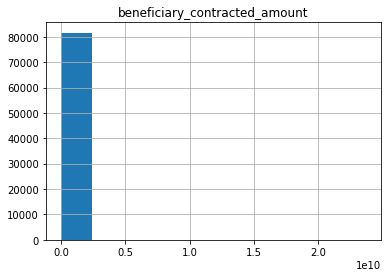

In [54]:
df.hist(column='beneficiary_contracted_amount')

### 2.1 Beware of the duplicates

Many datasets have duplications in them. This can have a good reason, for example multiple companies working on a project in the tidy data format would result in the project name being duplicated in both of the rows.

```python
.duplicated() # returns a Series of 'True' and 'False' rows where duplication occurs or not
.drop_duplicates() # gets rid of duplications
```

In [61]:
df[df["Beneficiary country"].duplicated()].head(2)

,Year,Budget,Reference of the Legal Commitment (LC),Reference (Budget),Name of beneficiary,VAT number of beneficiary,Not-for-profit organisation (NFPO),Non-governmental organisation (NGO),Coordinator,Address,City,Postal code,Beneficiary country,NUTS2,Geographical zone,Action location,Beneficiary’s contracted amount (EUR),Beneficiary’s estimated contracted amount (EUR),Beneficiary’s estimated consumed amount (EUR),Commitment contracted amount (EUR) (A),Additional/Reduced amount (EUR) (B),Commitment total amount (EUR) (A+B),Commitment consumed amount (EUR),Source of (estimated) detailed amount,Expense type,Subject of grant or contract,Responsible department,Budget line number,Budget line name,Programme name,Funding type,Beneficiary Group Code,Beneficiary type,Project start date,Project end date,Type of contract*,Management type,Benefiting country,beneficiary_contracted_amount
2,2021,BGUE,SCR.LCM.423526.01,SCR.CTR.423526.01.1,*****,*****,Yes,Yes,Yes,*****,*****,*****,Russia,NaN,*****,*****,"600,000.00","600,000.00","521,847.00","600,000.00",0.00,"600,000.00","521,847.00",The total amount of the commitment was attributed to a single beneficiary.,Operational,*****,NEAR - Directorate-General for Neighbourhood and Enlargement Negotiations,14 02 99 02,Completion of previous development cooperation instruments (prior to 2021),"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N...",Grant,LE05,Private Companies,01/04/2021,31/03/2023,Action Grant,Direct management,Russian Federation 100%,"600,000.00"
3,2021,BGUE,SCR.LCM.424361.01,SCR.CTR.424361.01.1,*****,*****,Yes,No,No,*****,*****,*****,Russia,NaN,*****,*****,"600,000.00","600,000.00","266,998.00","600,000.00",0.00,"600,000.00","266,998.00",The total amount of the commitment was attributed to a single beneficiary.,Operational,*****,NEAR - Directorate-General for Neighbourhood and Enlargement Negotiations,14 02 99 02,Completion of previous development cooperation instruments (prior to 2021),"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N...",Grant,LE05,Private Companies,01/07/2021,30/06/2024,Action Grant,Direct management,Russian Federation 100%,"600,000.00"


In [68]:
df[["Beneficiary country", "Non-governmental organisation (NGO)"]].drop_duplicates()

,Beneficiary country,Non-governmental organisation (NGO)
0,Afghanistan,No
1,Russia,Yes
3,Russia,No
31,Ukraine,No
34,Ukraine,Yes
...,...,...
66992,Suriname,No
71413,Japan,Yes
77905,Algeria,No
77928,Bahrain,No


## 3. Clean

Data cleaning is a very disliked but important step. In our dataset, the numeric columns contain a comma as thousands separators.<br>Therefore, Pandas does not recognize the number as a number, but as a string. See also the data type next to the columns in `df.info()`.

First, we will use `.str.replace()` to replace the comma with nothing. Then we will use `pd.to_numeric()` to make numeric column from a string.<br>
We will save the output in a new column. To create a new column, we will use the same syntax as for isolating a column, but assigning a value to it first.
```python
df["beneficiary_contracted_amount"] = pd.to_numeric(df["Beneficiary’s contracted amount (EUR)"].str.replace(",",""))
```

In [71]:
df["beneficiary_contracted_amount"] = pd.to_numeric(df["Beneficiary’s contracted amount (EUR)"].str.replace(",",""))

Another step of cleaning we might want to do is filtering the data to only contain columns we want.

```python
# make a list of column names we would like to keep
keep = ["Name of beneficiary", "beneficiary_contracted_amount", "Beneficiary country", "Beneficiary type" ,"Subject of grant or contract", "Programme name"]

# make a copy of a the DataFrame and use the same brackets as with selecting one column []
filtered = df.copy()[keep]
```

In [69]:
# make a list of column names we would like to keep
keep = ["Name of beneficiary", "beneficiary_contracted_amount", "Beneficiary country", "Beneficiary type" ,"Subject of grant or contract", "Programme name"]

# make a copy of a the DataFrame and use the same brackets as with selecting one column []
filtered = df.copy()[keep]

In [70]:
filtered

,Name of beneficiary,beneficiary_contracted_amount,Beneficiary country,Beneficiary type,Subject of grant or contract,Programme name
0,*****,0.00,Afghanistan,Private Companies,*****,"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N..."
1,*****,"600,000.00",Russia,Private Companies,*****,"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N..."
2,*****,"600,000.00",Russia,Private Companies,*****,"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N..."
3,*****,"600,000.00",Russia,Private Companies,*****,"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N..."
4,*****,"580,000.00",Russia,Private Companies,*****,"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N..."
...,...,...,...,...,...,...
81588,ZWIAZEK MIEDZYGMINNY D/S EKOLOGII W ZYWCU*THE ASSOCIATION OF COMMUNESFOR ECOLOGY IN ZYWIEC,"3,139.79",Poland,Public Bodies,"""SILESIA. BLUE SKY RESTORED. COMPREHENSIVE IMPLEMENTATION OF THE AIR QUALITY PLAN FOR THE SILES...",3.2.21 - Programme for Environment and Climate Action (LIFE)
81589,ZWIAZEK MIEDZYGMINNY D/S EKOLOGII W ZYWCU*THE ASSOCIATION OF COMMUNESFOR ECOLOGY IN ZYWIEC,81.93,Poland,Public Bodies,"""SILESIA. BLUE SKY RESTORED. COMPREHENSIVE IMPLEMENTATION OF THE AIR QUALITY PLAN FOR THE SILES...",3.2.21 - Programme for Environment and Climate Action (LIFE)
81590,ZWIAZEK MIEDZYGMINNY D/S EKOLOGII W ZYWCU*THE ASSOCIATION OF COMMUNESFOR ECOLOGY IN ZYWIEC,41.33,Poland,Public Bodies,"""SILESIA. BLUE SKY RESTORED. COMPREHENSIVE IMPLEMENTATION OF THE AIR QUALITY PLAN FOR THE SILES...",3.2.21 - Programme for Environment and Climate Action (LIFE)
81591,ZWIAZEK STOWARZYSZEN POLSKA ZIELONASIEC*PZS ALLIANCE OF ASSOCIATIONS POLISH GREEN NETWORK,"50,905.96",Poland,Private Companies,EMISSIONS TRADING EXTRA. MAKING EMISSIONS TRADING WORK FOR EU CITIZENS AND THE CLIMATE,3.2.21 - Programme for Environment and Climate Action (LIFE)


## 4. More exploration 

Let's first find out what is the largest award in our dataset. We will sort the table based on the newly created `beneficiary_contracted_amount` variable.

```python
filtered.nlargest(30, "beneficiary_contracted_amount")
```

In [72]:
filtered.nlargest(30, "beneficiary_contracted_amount")

,Name of beneficiary,beneficiary_contracted_amount,Beneficiary country,Beneficiary type,Subject of grant or contract,Programme name
59910,REPUBBLICA ITALIANA* REPUBLIQUE ITALIENNE ITALIAN REPUBLIC,"23,725,283,145.00",Italy,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
59771,REINO DE ESPANA*ROYAUME D ESPAGNEKINGDOM OF SPAIN,"23,065,765,153.00",Spain,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
60457,REPUBLIQUE FRANCAISE*FRENCH REPUBLIC,"12,041,274,610.00",France,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
13567,BUNDESREPUBLIK DEUTSCHLAND*REPUBLIQUE FEDERALE D ALLEMAGNE FEDERAL REPUBLIC OF GERMANY,"8,065,007,524.00",Germany,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
26326,ELLINIKI DIMOKRATIA* REPUBLIQUE HELLENIQUE HELLENIC REPUBLIC,"6,690,728,922.00",Greece,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
61406,ROMANIA*ROUMANIE,"5,055,214,413.00",Romania,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
60095,REPUBLICA PORTUGUESA*REPUBLIQUEPORTUGAISE PORTUGUESE REPUBLIC,"4,830,940,298.00",Portugal,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
64324,SLOVENSKA REPUBLIKA*REPUBLIQUE SLOVAQUE SLOVAK REPUBLIC,"2,298,418,370.00",Slovakia,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
60286,REPUBLIKA HRVATSKA* REPUBLIQUE DECROATIE REPUBLIC OF CROATIE,"2,292,950,571.00",Croatia,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)
43942,KONINKRIJK BELGIE*ROYAUME DE BELGIQUE KONIGREICH BELGIEN KINGDOM OF BELGIUM,"1,804,764,652.00",Belgium,Member States and national agencies,RECOVERY AND RESILIENCE FACILITY,2.2.21 - European Recovery and Resilience Facility (incl - Technical Support Instrument)


The largest values are Recovery and Resilience disimbursement to member states. We are mostly interested in private companies though. We can filter them out like this:

```python
filtered[filtered["Beneficiary type"] == "Private Companies"]
```

We can even save them as another separate DataFrame

```python
private_companies = filtered[filtered["Beneficiary type"] == "Private Companies"]
```

In [76]:
private_companies = filtered[filtered["Beneficiary type"] == "Private Companies"]

In [79]:
private_companies.nlargest(10, "beneficiary_contracted_amount")

,Name of beneficiary,beneficiary_contracted_amount,Beneficiary country,Beneficiary type,Subject of grant or contract,Programme name
34869,GAVI ALLIANCE,"300,000,000.00",Switzerland,Private Companies,CONTRIBUTION TO THE AVAILABILITY AND EQUITABLE ACCESS TO COVID-19 VACCINES IN LOW AND LOWER-MIDD...,"6.0.111 - Neighbourhood, Development and International Cooperation Instrument - Global Europe (N..."
20037,COST ASSOCIATION*,"153,000,000.00",Belgium,Private Companies,101052416 - SGA1-HE - COST: EUROPE'S MOST EMPOWERING RESEARCH PROGRAMME\nSTRENGTHENING SCIENCE A...,1.0.11 - Horizon Europe
34602,FUNDACJA ROZWOJU SYSTEMU EDUKACJI*FOUNDATION FOR THE DEVELOPMENT OF THE EDUCATIONAL SYSTEM,"144,053,473.00",Poland,Private Companies,2021 - CONTRIBUTION AGREEMENT OF THE ERASMUS+ PROGRAMME - NATIONAL AGENCY IN POLAND,2.2.32 - Erasmus+
57934,POLSKIE SIECI ELEKTROENERGETYCZNE SPOLKA AKCYJNA,"143,931,233.58",Poland,Private Companies,"4.8.10-0005-LVEE-W-M-20 - INEA/CEF/ENER/M2020/2226437 - ""IMPLEMENTATION OF BALTIC SYNCHRONISATIO...",1.0.222 - Connecting Europe Facility (CEF) - Energy
45480,LITGRID AB*,"140,301,867.90",Lithuania,Private Companies,"4.8.10-0005-LVEE-W-M-20 - INEA/CEF/ENER/M2020/2226437 - ""IMPLEMENTATION OF BALTIC SYNCHRONISATIO...",1.0.222 - Connecting Europe Facility (CEF) - Energy
23970,DEUTSCHER AKADEMISCHER AUSTAUSCHDIENST EV*DAAD GERMAN ACADEMIC EXCHANGE SERVICE,"116,557,195.00",Germany,Private Companies,2021 - CONTRIBUTION AGREEMENT OF THE ERASMUS+ PROGRAMME - NATIONAL AGENCY IN GERMANY,2.2.32 - Erasmus+
57935,POLSKIE SIECI ELEKTROENERGETYCZNE SPOLKA AKCYJNA,"84,519,567.32",Poland,Private Companies,"4.8.10-0005-LVEE-W-M-20 - INEA/CEF/ENER/M2020/2226437 - ""IMPLEMENTATION OF BALTIC SYNCHRONISATIO...",1.0.222 - Connecting Europe Facility (CEF) - Energy
45481,LITGRID AB*,"82,388,324.44",Lithuania,Private Companies,"4.8.10-0005-LVEE-W-M-20 - INEA/CEF/ENER/M2020/2226437 - ""IMPLEMENTATION OF BALTIC SYNCHRONISATIO...",1.0.222 - Connecting Europe Facility (CEF) - Energy
18313,COMPANIA NATIONALA DE CAI FERATE CFR SA*NATIONAL RAILWAY COMPANY CFR,"74,428,952.40",Romania,Private Companies,2015-RO-TM-0362-W - INEA/CEF/TRANS/M2015/1131642 - SIGHISOARA RAILWAY SECTION SUB-SECTION APATA-...,"2.1.122 - Cohesion Fund (CF), contribution to the Connecting Europe Facility (CEF) - Transport"
66969,STICHTING NUFFIC,"68,488,521.00",Netherlands,Private Companies,2021 - CONTRIBUTION AGREEMENT OF THE ERASMUS+ PROGRAMME - NATIONAL AGENCY IN THE NETHERLANDS,2.2.32 - Erasmus+


Now that we have a numeric column to explore, let's use two ways to group our data:

```python
df.groupby("column").agg() # aggregate based on 1 or more columns (more columns reqire making a list)
pd.pivot_table(df, index="column1", columns="column2", values="column3", aggfunc="sum") # will create a pivot table with a column in the rows and in the columns
```
So let's try:

```python
private_companies.groupby("Name of beneficiary").sum()
```

This will sum up the money acquired by a particular beneficiary. Instead of `.sum()` we can use for example `.count()`, `.mean()`, `.median()`, `.min()`, `.max()`. You can also use multiple of these at the same time, using the `.agg()` function. Google how that works.


In [89]:
private_companies.groupby(["Name of beneficiary", "Beneficiary country"]).sum().nlargest(10, "beneficiary_contracted_amount")

,,beneficiary_contracted_amount
Name of beneficiary,Beneficiary country,
DEUTSCHE GESELLSCHAFT FUR INTERNATIONALE ZUSAMMENARBEIT (GIZ) GMBH*,Germany,"353,241,076.80"
PKP POLSKIE LINIE KOLEJOWE SPOLKA AKCYJNA*,Poland,"348,517,255.84"
GAVI ALLIANCE,Switzerland,"300,000,000.00"
LITGRID AB*,Lithuania,"234,866,198.47"
POLSKIE SIECI ELEKTROENERGETYCZNE SPOLKA AKCYJNA,Poland,"228,450,800.90"
FUNDACJA ROZWOJU SYSTEMU EDUKACJI*FOUNDATION FOR THE DEVELOPMENT OF THE EDUCATIONAL SYSTEM,Poland,"178,454,693.00"
ARHS DEVELOPMENTS SA,Luxembourg,"165,152,040.42"
NEDERLANDSE FINANCIERINGS-MAATSCHAPPIJ VOOR ONTWIKKELINGSLANDEN NV*,Netherlands,"160,450,000.00"
COST ASSOCIATION*,Belgium,"153,000,000.00"


In [95]:
private_companies.groupby("Name of beneficiary").agg(["sum", "count"])["beneficiary_contracted_amount"].nlargest(10, "sum")

,sum,count
Name of beneficiary,,
DEUTSCHE GESELLSCHAFT FUR INTERNATIONALE ZUSAMMENARBEIT (GIZ) GMBH*,"353,241,076.80",96
PKP POLSKIE LINIE KOLEJOWE SPOLKA AKCYJNA*,"348,517,255.84",23
GAVI ALLIANCE,"300,000,000.00",1
LITGRID AB*,"234,866,198.47",3
POLSKIE SIECI ELEKTROENERGETYCZNE SPOLKA AKCYJNA,"228,450,800.90",2
FUNDACJA ROZWOJU SYSTEMU EDUKACJI*FOUNDATION FOR THE DEVELOPMENT OF THE EDUCATIONAL SYSTEM,"178,454,693.00",15
ARHS DEVELOPMENTS SA,"165,152,040.42",3760
NEDERLANDSE FINANCIERINGS-MAATSCHAPPIJ VOOR ONTWIKKELINGSLANDEN NV*,"160,450,000.00",6
COST ASSOCIATION*,"153,000,000.00",1


Pivot tables are similar to groupby, but they have rows and columns.

```python
pd.pivot_table(filtered, index="Beneficiary country", columns="Beneficiary type", values="beneficiary_contracted_amount", aggfunc="sum")
```

In [90]:
pd.pivot_table(filtered, index="Beneficiary country", columns="Beneficiary type", values="beneficiary_contracted_amount", aggfunc="sum")

Beneficiary type,EC departments and other EU entities,EFTA Countries,EIB - European Investment Bank,EIF - European Investment Fund,EU Trust Funds,International Organisations,Member States and national agencies,Private Companies,Private persons,Public Bodies,Third States
Beneficiary country,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,143,678.90",NaN,"2,188,019.46","130,963,144.88"
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"166,091.13",NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,229,525.20",NaN,NaN,"19,400,000.00"
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,484,091.00",NaN,"2,919,599.11","13,023.37"
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,215,779.97","20,000.00",0.00,NaN
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"879,598.00",NaN,"769,081.45",NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"485,000.00",NaN,NaN,NaN


## 5.Data visualization

In [7]:
import altair as alt

You can find lots of examples on how to make data visualizations with altair on [the documentation example gallery](https://altair-viz.github.io/gallery/index.html)

Making a simple bar chart of the top 5 largest recipients:

```python
chart_data = filtered.nlargest(5, "beneficiary_contracted_amount")

alt.Chart(chart_data).mark_bar().encode(
       y = alt.Y("Name of beneficiary", sort="-x"),
       x = "beneficiary_contracted_amount"
)
```

## 6. Conditional formatting

To highlight the largest values of a table, pandas offers us the possibility to use styling on the dataset.

```python
pivot = pd.pivot_table(filtered, index="Beneficiary country", columns="Beneficiary type", values="beneficiary_contracted_amount", aggfunc="sum")
pivot[["Private Companies", "Private persons" ,"Public Bodies"]].nlargest(30, 'Private Companies').style.background_gradient()
```

# Merging data

Let's combine the data with another dataset. This is the where we can get unique insights. We will combine the Financial Transparency System data with the Transparency System data (lobby register).

```python
df2 = pd.read_excel("data/TransparencyRegister.xls")
df2.sample(3)
```

We need to find a column in both datasets that is the same. Which one would that be?

There are disparities in the case of the values of this column. Let's fix that first.

Now let's `merge` and have a look at the data

```python
pd.merge(df1, df2, left_on="column", right_on="column", how="inner")
```
Merge possibilities: 
* `inner` - new data has only rows that contain matches
* `outer` - new data contains all rows from both data sets
* `left` - new data contains all rows from the 'left' data set
* `right` - guess

Let's use `groupby` to get some more information

## Beware of duplicates especially while merging

In the FTS, a company can get multiple contracts in a year. That means that it can appear in multiple rows in the data. In the Transparency Register, there is only one row per institution.